**Importy**

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import cmath
import math
import statistics
from scipy.special import gamma
from random_gen import *
from Imports import *
R = RandomGen()

In [5]:
def drawdemp(random_sample, sub=None, title=None,  xlim_min=None, xlim_max=None):
    """Draws CDF for the given random_sample."""
    xs = np.array(random_sample, dtype=np.float)
    xs.sort()
    step = (xs[-1] - xs[0]) / xs.size
    xs = np.insert(xs, 0, xs[0] - step)
    xs = np.insert(xs, xs.size, xs[-1] + step)
    ys = np.linspace(0, 1, xs.size - 1)

    fig, ax = plt.subplots()
    ax.hlines(y=ys, xmin=xs[:-1], xmax=xs[1:])
    ax.vlines(x=xs[1:-1], ymin=ys[:-1], ymax=ys[1:], linestyle='dashed')
    ax.set_xlim(min(xs), max(xs))
    plt.xlabel("x")
    plt.ylabel("F(x)")
    if xlim_min:
        ax.set_xlim(xlim_min, max(xs))
    if xlim_max:  
        ax.set_xlim(min(xs), xlim_max)
    if xlim_min and xlim_max:
        ax.set_xlim(xlim_min, xlim_max)
    if sub:
        plt.plot(xs, [sub(i) for i in xs])
    if title:
        plt.title(title)
    plt.show()

def drawdemp_mult(data, title=None, label=None, xlim_min=None, xlim_max=None):
    """Draws CDFs for the given random_samples."""
    fig, ax = plt.subplots()
    if type(data) == list:
        colors =  plt.cm.get_cmap('hsv', len(data))
        for i, random_sample in enumerate(data):
            random_sample.sort()
            step = (random_sample[-1] - random_sample[0])/len(random_sample)
            xs = [random_sample[0] - step] + random_sample + [random_sample[-1] + step]
            ys = np.linspace(0, 1, len(xs) - 1)
            if label:
                ax.hlines(y=ys, xmin=xs[:-1], xmax=xs[1:], color=colors(i), label=label[i])
            else:
                ax.hlines(y=ys, xmin=xs[:-1], xmax=xs[1:], color=colors(5))
            ax.vlines(x=xs[1:-1], ymin=ys[:-1], ymax=ys[1:], linestyle='dashed', color=colors(i))
            ax.set_xlim(xs[0], xs[-1])
    else:
        random_sample=data
        random_sample.sort()
        step = (random_sample[-1] - random_sample[0])/len(random_sample)
        xs = [random_sample[0] - step] + random_sample + [random_sample[-1] + step]
        ys = np.linspace(0, 1, len(xs) - 1)

        fig, ax = plt.subplots()
        ax.hlines(y=ys, xmin=xs[:-1], xmax=xs[1:])
        ax.vlines(x=xs[1:-1], ymin=ys[:-1], ymax=ys[1:], linestyle='dashed')
        ax.set_xlim(xs[0], xs[-1])

    if xlim_min:
        ax.set_xlim(xlim_min, xs[-1])
    if xlim_max:  
        ax.set_xlim(xs[0], xlim_max)
    if xlim_min and xlim_max:
        ax.set_xlim(xlim_min, xlim_max)

    if title:
        plt.title(title)
    if label:
        plt.legend()
        
def compatibility_1(a, b, mu, s, dist, n=100):
    alfa = 0.05
    X_n = []
    for j in range(n):
        sample = stable_distribution(a, b, mu, s, 1000)
        X_n.append(stats.kstest(sample, dist).pvalue > alfa)
    return sum(X_n) / n


def compatibility_2(a, b, mu, s, rvs, n=100):
    alfa = 0.05
    X_n = []
    for j in range(n):
        sample = stable_distribution(a, b, mu, s, 1000)
        X_n.append(stats.ks_2samp(sample, rvs).pvalue > alfa)
    return sum(X_n) / n


def pareto_compatibility(dist, a=1, b=1, n=100):
    alfa = 0.05
    X_n = []
    for j in range(n):
        sample = symmetric_pareto_gen(a, b, 1000)
        X_n.append(stats.kstest(sample, dist).pvalue > alfa)
    return sum(X_n) / n


def pareto_compatibility2(dist, a=1, A=1, n=100):
    alfa = 0.05
    X_n = []
    for j in range(n):
        sample = asymmetric_pareto_gen(1000, A, a)
        X_n.append(stats.kstest(sample, dist).pvalue > alfa)
    return sum(X_n) / n

**Rozkłady $\alpha$-stabilne**

**Rozkłady stabilne** to rozkłady o funkcji charakterystycznej postaci:


$$\phi(t) = e^{i\mu t - |\sigma t|^{\alpha}(1-i\beta \mathrm{sgn}{(t)}\tan{(\frac {\pi\alpha}{2})})}, \alpha \ne 1,$$ 

$$\phi(t) = e^{i\mu t - |\sigma t|^{\alpha}(1+i\beta \mathrm{sgn}{(t)}\frac{2}{\pi}\log{|t|})}, \alpha = 1.$$ 


*   $\alpha \in (0,2]$ - parametr stabilności,
*   $\beta \in [-1,1]$ - parametr skośności,
    
    dla $\beta = 0$ - rozkład jest symetryczny,
    
    dla $\beta > 0$ - rozkład jest skupiony bardziej na półprostej dodatniej,

    dla $\beta < 0$ - rozkład jest skupiony bardziej na półprostej ujemnej.

*   $\mu \in \mathbb{R} $ - parametr lokalizacji.
*   $\sigma > 0 $ - parametr skali,


Rozkład stabilny o funkcji charakterystycznej $\phi_{α,β,\mu,\sigma}(t)$ oznaczać będziemy $S(α, β, \mu, \sigma)$

**Podstawowe własności rozkładów stabilnych:**


1.   Jeżeli zmienne losowe $Y_1$ i $Y_2$ są niezależne i mają taki sam rozkład stabilny  $S(α, β, \mu, \sigma)$ jak zmienna losowa Y , to dla dowolnych stałych $λ_1$, $λ_2$ > 0
$$λ_1Y_1 + λ_2Y_2 \stackrel{d}{=} λY + \delta$$
dla $λ = (λ_1^\alpha + λ_2^\alpha )^{1/\alpha}$ oraz pewnej stałej $\delta$.


2.  Jeżeli zmienne losowe $Y_1$ i $Y_2$ są niezależne i mają rozkład stabilny z tym samym parametrem $\alpha$ (tzn. $Y_i \sim S(α, β_i, \mu_i, \sigma_i), i = 1, 2, \ldots$), wtedy zmienna losowa $Z = Y_1 + Y_2$ ma również rozkład stabilny
$$Z \sim S(α,\frac{\beta_1 \sigma_1^\alpha + \beta_2 \sigma_2^\alpha}{\sigma_1^\alpha + \sigma_2^\alpha} ,\mu_1 + \mu_2, (\sigma_1^\alpha + \sigma_2^\alpha)^{\frac{1}{2}})\text{, } \alpha \in (0, 2].$$

3.   Jeśli zmienna losowa $Y$ ma rozkład stabilny  $S(α, β, \mu, \sigma)$, to zmienna losowa $aY$, $a \in \mathbb{R}$, ma rozkład:

$$S(α, β\mathrm{sgn}{(t)}, \mu a, \sigma |a|), \alpha \ne 1,$$
$$S(1, β\mathrm{sgn}{(t)}, \mu a - \log{(|a|)}a\sigma \beta \frac{2}{\pi}, \sigma |a|), \alpha = 1.$$

4.   Jeśli zmienna losowa $Y$ ma rozkład stabilny  $S(α, β, \mu, \sigma)$, to zmienna losowa $a + Y$, $a \in \mathbb{R}$, ma rozkład:
$$S(α, β, \mu + a, \sigma), \alpha \in (0, 2] .$$

5.   Jeśli $X_1, X_2, ..., X_n$ są i.i.d.,  $ X_i \sim S(α, β, \mu, \sigma)$, wtedy:

$$X_1, X_2, ..., X_n \stackrel{d}{=} n^{\frac{1}{\alpha}}X_1 + \mu(n - n^{\frac{1}{\alpha}})\text{, } \alpha \ne 1,$$
$$X_1, X_2, ..., X_n \stackrel{d}{=} nX_1 + \frac{2}{\pi}\sigma\beta n \log{(n)} \text{, } \alpha = 1.$$





**Gęstości rozkładów stabilnych**

Wszystkie rozkłady stabilne to rozkłady ciągłe.

Gęstość rozkładu $\alpha$ - stabilnego możemy wyrazić za pomocą funkcji elementarnych jedynie w trzech przypadkach:



*   **Rozkład normalny** $\mathcal{N}(m,s^2)$:

    $\alpha = 2$, $\beta$ - nieistotne, $\mu = m$, $\sigma = \frac{\sqrt{2}}{2}s$ 
    $$f(x) = \frac{1}{\sqrt{2\pi}s} e^{-\frac{(x - m)^2}{2s^2}}\text{, } x \in \mathbb{R} .$$

*    **Rozkład Cauchy'ego** $\mathcal{C}(0,1)$:

    $\alpha = 1$, $\beta = 0$ , $\mu = 0$, $\sigma = 1$ 
    $$f(x) = \frac{1}{\pi} \frac{1}{1 + x^2}\text{, } x \in \mathbb{R}.$$

*   **Rozkład Le$\acute{v}$y'ego**:

    $\alpha = \frac{1}{2}$, $\beta = 1$ , $\mu = 0$, $\sigma = a^2$ 
    $$f(x) = \frac{a}{\sqrt{2\pi}}x^{-\frac{3}{2}} e^{-\frac{a^2}{2x}} \text{, } x >0 \text{, } a> 0.$$



**Własność ciężkich ogonów oraz momenty rozkładów stabilnych**

Rozkłady stabilne dla $\alpha < 2$ (prócz rozkładu Gaussa) mają tzw. **"ciężkie" ogony** , tzn. dla $Y$ o rozkładzie $S(α, β, \mu, \sigma)$ z $\alpha < 2$ zachodzi przynajmniej jedna z własności: 

$$P(Y\geq x) \sim x^{-\alpha}$$
$$P(Y\leq -x) \sim x^{-\alpha}$$

przy $x \to \infty.$

Z tej własności wynika, że dla zmiennej losowej $Y \sim S(α, β, \mu, \sigma)$ z $\alpha < 2$ mamy
$$E|Y|^p < \infty \iff p < \alpha.$$
W szczególności, $D^2Y = \infty$, a $EY$ istnieje tylko dla $\alpha > 1.$

Gdy $Y$ ma rozkład normalny, $E|Y|^p$ istnieje dla dowolnego $p > 0.$


**Algorytm generowania zmiennych losowych z rozkładu $\alpha$ - stabilnego**

Generuj $U$ z rozkładu $U(-π/2,π/2)$ ;

Generuj niezależnie E z rozkładu wykładniczego $E(1)$ ;


\begin{equation}
\begin{split}
\text{if } \alpha \neq 1  \text{ then}\\
&S = (1 + \beta^2 \tan{\frac{\pi\alpha}{2}}^2)^{\frac{1}{2\alpha}}\\
&B = \frac{1}{\alpha}\arctan{(\beta\tan{(\frac{1}{2\alpha}}))}\\
&X = S\frac{\sin{(\alpha(U+B))}}{(\cos{(U)})^{1/\alpha}}\left( \frac{\cos{(U - \alpha(U + B))}}{E}\right)^{\frac{1-\alpha}{\alpha}}\\
&\text{return }Y = \sigma X + \mu\\
\text{end }\\
\text{else }\\
&X = \frac{2}{\pi}\left( (\frac{\pi}{2} + \beta U)\tan{U} - \beta\log{\left (\frac{\frac{\pi}{2}E\cos{U}}{\frac{\pi}{2}+\beta U}\right)}\right)\\
&\text{return } Y = \sigma X + \frac{2}{\pi}\beta\sigma\log{\sigma} + \mu\\
\text{end}
\end{split}
\end{equation}

**Uwaga**

W całym zadaniu korzystam tylko z naszych generatorów.

In [2]:
def stable_distribution(a, b, mu, s, N):
    """Returns random variables from the Lévy alpha-stable distribution
    a - stability parameter,
    b - skewness parameter,
    mu - location parameter,
    s - scale parameter > 0,"""
    Y = []
    for i in range(N):
        U = R.random_float(n=1, a=-np.pi/2, b=np.pi/2, to_float=True)
        E = R.exp_gen(1, 1)
        if a != 1:
            S = ((1 + (b**2)*((np.tan(np.pi*a/2))**2)))**(1/(2*a))
            B = (1/a)*np.arctan(b*np.tan(np.pi*a/2))
            X = (S*((np.sin(a*(U + B)))/(np.cos(U)**(1/a))))*(((np.cos(U - a*(U + B)))/E)**((1-a)/a))
            y = s*X + mu
            Y.append(y)
        else:
            X = (2/np.pi)*((np.pi/2 + b*U)*np.tan(U) - b*np.log(((np.pi/2)*E*np.cos(U))/(np.pi/2 + b*U)))
            y = s*X + (2/np.pi)*b*s*np.log(s) + mu
            Y.append(y)
    return Y

In [10]:
print('Rozkład normalny')
norm = stable_distribution(2, 0, 0, np.sqrt(2)/2, 1000)
KS1 = compatibility_1(2, 0, 0, np.sqrt(2)/2, stats.norm.cdf, n=100)
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS1)


Rozkład normalny
Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 0.96


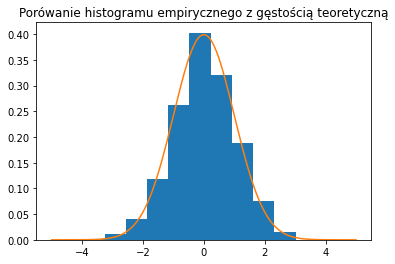

In [9]:
plt.hist(norm, density=True)
t = np.linspace(-5,5,1000)
plt.plot(t, norm_pdf(t, 0, 1))
plt.title("Porówanie histogramu empirycznego z gęstością teoretyczną")
plt.show()

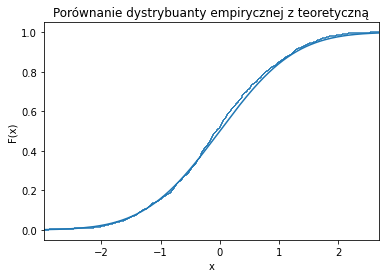

In [26]:
drawdemp(norm, sub=stats.norm.cdf, title="Porównanie dystrybuanty empirycznej z teoretyczną")

Wykres empiryczny funkcji charakterystycznej


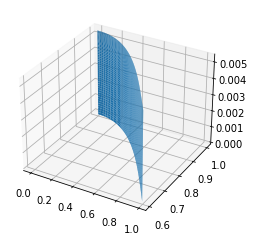

Wykres teoretyczny funkcji charakterystycznej


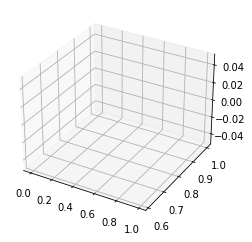

In [11]:
print("Wykres empiryczny funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(norm, x))
print("Wykres teoretyczny funkcji charakterystycznej")
plot_3d_complex(norm_char)

Wykresy empiryczne funkcji charakterystycznej


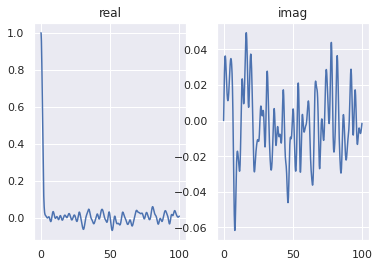

Wykresy teoretyczne funkcji charakterystycznej


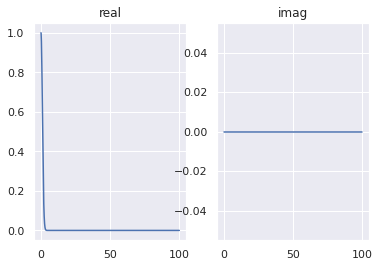

In [163]:
ys = np.arange(0, 100, 0.1)
print("Wykresy empiryczne funkcji charakterystycznej")
plot_2d_complex(lambda x : empchar(norm, x), xs=ys)#oscyluje wokół zera
print("Wykresy teoretyczne funkcji charakterystycznej")
plot_2d_complex(norm_char, xs=ys)

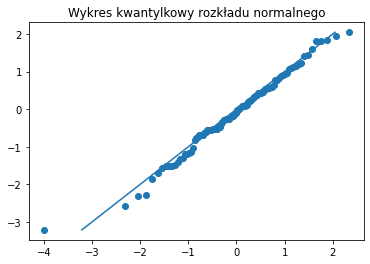

In [12]:
stable1 = stable_distribution(2, 0, 0, np.sqrt(2)/2, 100)
drawqq(stable1, stats.norm.cdf, title="Wykres kwantylkowy rozkładu normalnego")

**Wniosek**

Rozkład normalny jest szczególnym przypadkiem rozkładu stabilnego.

In [165]:
print("Rozkład Cauchy'ego")
cauchy = stable_distribution(1, 0, 0, 1, 1000)

KS1 = compatibility_1(1, 0, 0, 1, stats.cauchy.cdf, n=100)
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS1)


Rozkład Cauchy'ego
Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 0.95


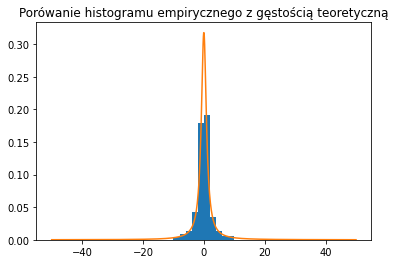

In [ ]:
plt.hist(cauchy, density=True, range=(-10, 10))
t = np.linspace(-50,50,1000)
plt.plot(t, cauchy_pdf(t, 0, 1))
plt.title("Porówanie histogramu empirycznego z gęstością teoretyczną")
plt.show()

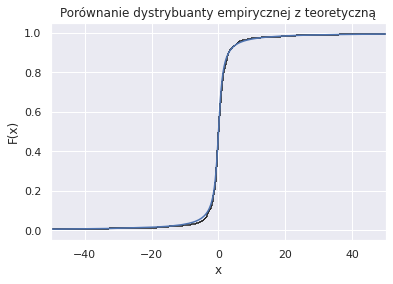

In [9]:
drawdemp(cauchy, sub=stats.cauchy.cdf, title="Porównanie dystrybuanty empirycznej z teoretyczną",xlim_min=-50, xlim_max=50)

Wykres empiryczny funkcji charakterystycznej


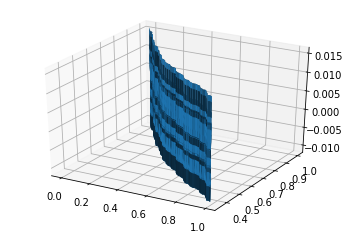

Wykres teoretyczny funkcji charakterystycznej


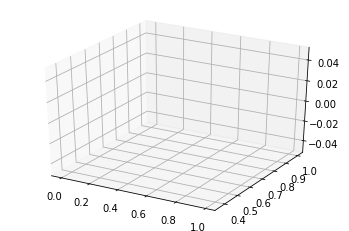

In [ ]:
print("Wykres empiryczny funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(cauchy, x))
print("Wykres teoretyczny funkcji charakterystycznej")
plot_3d_complex(cauchy_char)

Wykresy empiryczne funkcji charakterystycznej


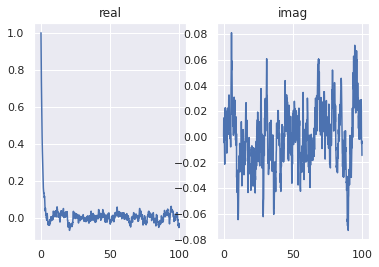

Wykresy teoretyczne funkcji charakterystycznej


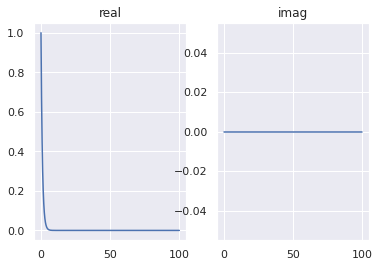

In [166]:
ys = np.arange(0, 100, 0.1)
print("Wykresy empiryczne funkcji charakterystycznej")
plot_2d_complex(lambda x : empchar(cauchy, x), xs=ys)#część urojona oscyluje wokól 0
print("Wykresy teoretyczne funkcji charakterystycznej")
plot_2d_complex(cauchy_char, xs=ys)

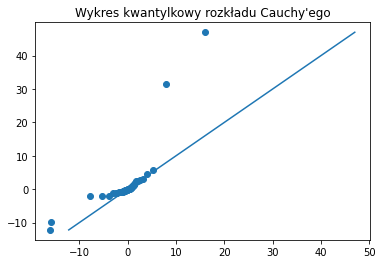

In [ ]:
stable2 = stable_distribution(1, 0, 0, 1, 50)#rozkład Cauchy'ego
drawqq(stable2, stats.cauchy.cdf, title="Wykres kwantylkowy rozkładu Cauchy'ego")

**Wniosek**

Rozkład Cauch'ego jest szczególnym przypadkiem rozkładu stabilnego.

In [167]:
print("Rozkład Levy'ego")
a1 = stable_distribution(1/2, 1, 0, 1, 10000)

l1 = stats.levy_stable.rvs(alpha=1/2, beta=1, size=len(a1))
KS2 = compatibility_2(1/2, 1, 0, 1, l1, n=100)
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS2)



Rozkład Levy'ego
Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 1.0


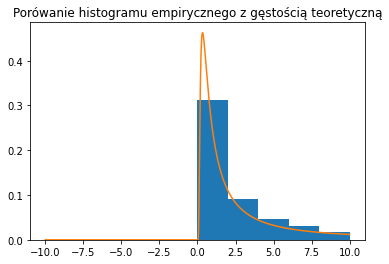

In [ ]:
plt.hist(a1, density=True, range=(-10, 10))
t = np.linspace(-10,10,1000)
plt.plot(t, stats.levy_stable.pdf(t, alpha=1/2, beta=1, loc=0, scale=1))
plt.title("Porówanie histogramu empirycznego z gęstością teoretyczną")
plt.show()

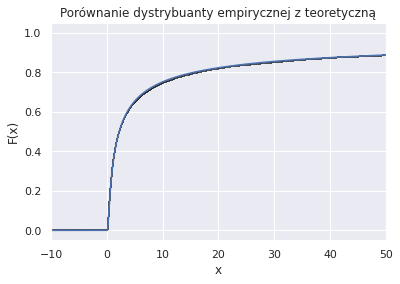

In [11]:
drawdemp(a1, sub=lambda x: stats.levy_stable.cdf(x, alpha=1/2, beta=1), title="Porównanie dystrybuanty empirycznej z teoretyczną",xlim_min=-10, xlim_max=50 ) 

Wykres empiryczny funkcji charakterystycznej


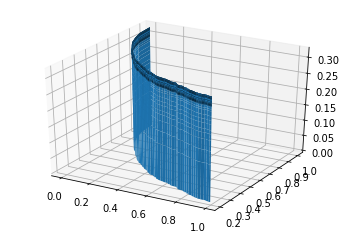

Wykres teoretyczny funkcji charakterystycznej


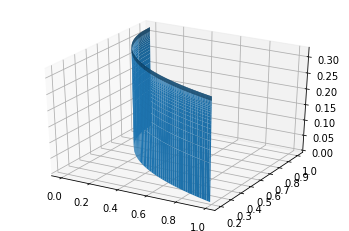

In [ ]:
print("Wykres empiryczny funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(a1, x))
print("Wykres teoretyczny funkcji charakterystycznej")
plot_3d_complex(lambda x: stable_char(x, a=1/2, b=1))

Wykresy empiryczne funkcji charakterystycznej


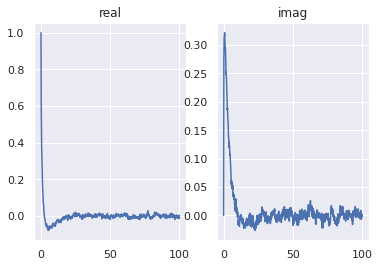

Wykresy teoretyczne funkcji charakterystycznej


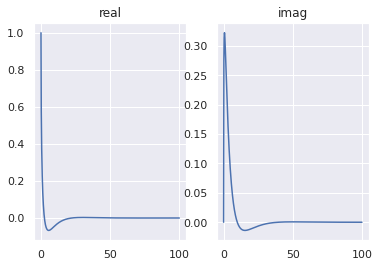

In [168]:
ys = np.arange(0, 100, 0.1)
print("Wykresy empiryczne funkcji charakterystycznej")
plot_2d_complex(lambda x : empchar(a1, x), xs=ts)
print("Wykresy teoretyczne funkcji charakterystycznej")
plot_2d_complex(lambda x: stable_char(x, a=1/2, b=1), xs=ts)

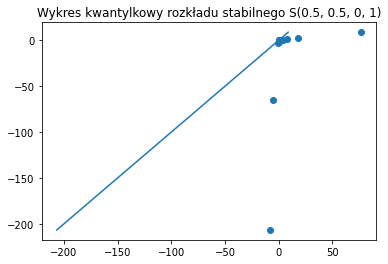

In [13]:
stable3 = stable_distribution(1/2, 1/2, 0, 1, 15)
drawqq(stable3, lambda x: stats.levy_stable.cdf(x, alpha=1/2, beta=1/2), title="Wykres kwantylkowy rozkładu stabilnego S(0.5, 0.5, 0, 1)")

**Wniosek**

Rozkład Levy'ego jest szczególnym przypadkiem rozkładu stabilnego.

In [171]:
print("Rozkład stabilny dla alpha=sqrt(2)")

a2 = stable_distribution(np.sqrt(2), 0, 0, 1, 1000)

l2 = stats.levy_stable.rvs(alpha=np.sqrt(2), beta=0, size=len(a2))
KS2 = compatibility_2(np.sqrt(2), 0, 0, 1, l2, n=100)
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS2)

Rozkład stabilny dla alpha=sqrt(2)
Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 0.98


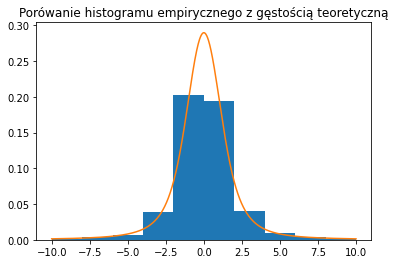

In [ ]:
plt.hist(a2, density=True, range=(-10, 10))
t = np.linspace(-10,10,1000)
plt.plot(t, stats.levy_stable.pdf(t, alpha=np.sqrt(2), beta=0, loc=0, scale=1))
plt.title("Porówanie histogramu empirycznego z gęstością teoretyczną")
plt.show()

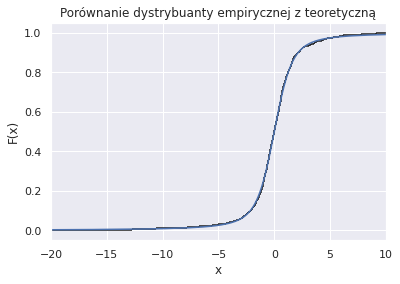

In [14]:
drawdemp(a2, sub=lambda x: stats.levy_stable.cdf(x, np.sqrt(2), beta=0), title="Porównanie dystrybuanty empirycznej z teoretyczną",xlim_min=-20, xlim_max=10)

Wykres empiryczny funkcji charakterystycznej


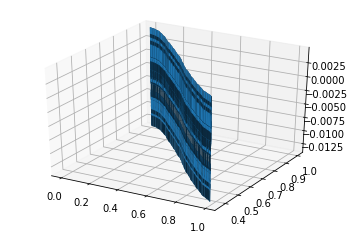

Wykres teoretyczny funkcji charakterystycznej


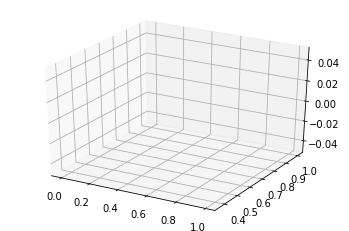

In [ ]:
print("Wykres empiryczny funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(a2, x))
print("Wykres teoretyczny funkcji charakterystycznej")
plot_3d_complex(stable_char2)

Wykresy empiryczne funkcji charakterystycznej


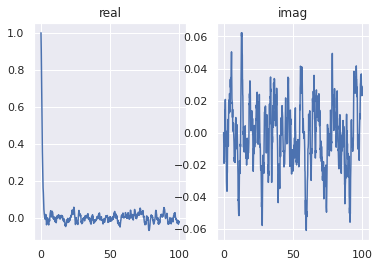

Wykresy teoretyczne funkcji charakterystycznej


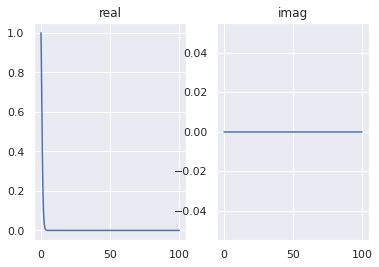

In [172]:
ys = np.arange(0, 100, 0.1)
print("Wykresy empiryczne funkcji charakterystycznej")
plot_2d_complex(lambda x : empchar(a2, x), xs=ys)
print("Wykresy teoretyczne funkcji charakterystycznej")
plot_2d_complex(stable_char2, xs=ys)

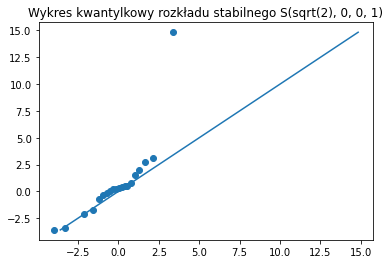

In [ ]:
stable4 = stable_distribution(np.sqrt(2), 0, 0, 1, 20)#sqrt(2)
drawqq(stable4, lambda x: stats.levy_stable.cdf(x, alpha=np.sqrt(2), beta=0), title="Wykres kwantylkowy rozkładu stabilnego S(sqrt(2), 0, 0, 1)")

**Wnioski**

Generator liczb z rozkładu stabilnego działa poprawnie, przechodzi test Kołmogorowa-Smirnowa. Dystrybuanty empiryczne pokrywają się z teoretycznymi. Również histogramy empiryczne rozkładów pokrywają się z gęstościami teoretycznymi. Wykresy empirycznych funkcji charakterystycznych oraz wykresy kwantylowe dają zadowalające wyniki.

**Generatory liczb z symetrycznego rozkładu Pareto**


1.   Generator liczb z symetrycznego rozkładu Pareto napisany za pomocą metody 
odwracania dystrybuanty.

    Symetryczny rozkład Pareto zdefiniowany dystrybuantą postaci:
$$F(x) = \frac{1}{2}\left( \frac{b}{b-x}\right)^{\alpha}, x<0$$
$$F(x) = 1 - \frac{1}{2}\left( \frac{b}{b+x}\right)^{\alpha}, x\geq 0$$
gdzie $\alpha \in (0,2), b \in \mathbb{R}.$

In [14]:
def symmetric_pareto_dis(x, a=1, b=1):
    """Symmetric Pareto distribution """
    if x >= 0:
        return 1 - (1/2)*((b/(b + x))**a)
    else:
        return (1/2)*((b/(b - x))**a)

def pareto_density(x, a, b):
    """Symmetric Pareto density """
    return ((a*b)**a)/(2*(b + abs(x))**(a + 1))


def symmetric_pareto_gen(a, b, n):
    """Returns random variables from the Symmetric Pareto distribution """
    Y = []
    for i in range(n): 
        U = R.random_float(n=1, to_float=True)
        if U > 0.5:
            y = b/((2*(1 - U))**(1/a)) - b
            Y.append(y)   
        else:
            if b >=1:
                y = -b/((2*U)**(1/a)) + b
                Y.append(y) 
            else:
                y = b/((2*U)**(1/a)) + b
                Y.append(y)    
    return Y


In [15]:
X = symmetric_pareto_gen(1, 1, 1000)
xs = np.linspace(-10, 10, 1000)

KS1 = pareto_compatibility(dist=np.vectorize(symmetric_pareto_dis))
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS1)


Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 0.98


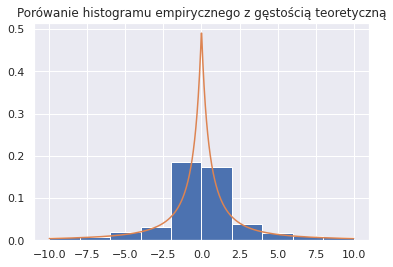

In [21]:
g = pareto_density(xs, 1, 1)
plt.hist(X, density=True, range=(-10, 10))
plt.title("Porówanie histogramu empirycznego z gęstością teoretyczną")
plt.plot(xs, g)

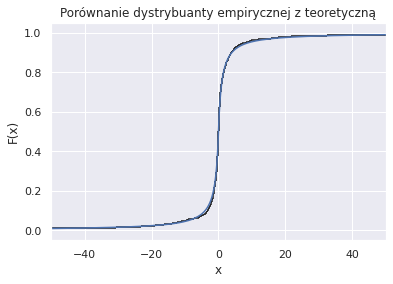

In [21]:
drawdemp(X, sub=np.vectorize(symmetric_pareto_dis), title="Porównanie dystrybuanty empirycznej z teoretyczną",xlim_min=-50, xlim_max=50)

Wykresy empiryczne funkcji charakterystycznej


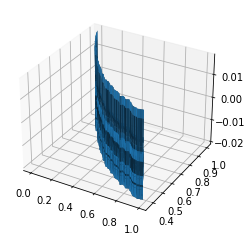

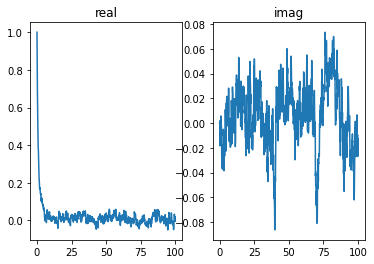

In [16]:
ys = np.arange(0, 100, 0.1)
print("Wykresy empiryczne funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(X, x))
plot_2d_complex(lambda x : empchar(X, x), xs=ys)

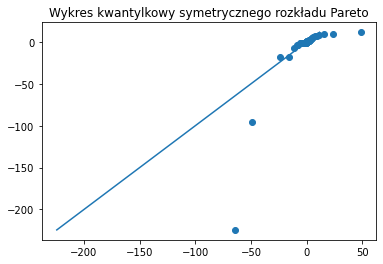

In [ ]:
P = symmetric_pareto_gen(1, 1, 100)
drawqq(P, symmetric_pareto_dis, title="Wykres kwantylkowy symetrycznego rozkładu Pareto")

2.   Generator liczb z symetrycznego rozkładu Pareto napisany za pomocą metody 
odwracania dystrybuanty.

  Generator najpierw generuje zmienną z niesymetryczneg rozkładu Pareto, a następnie z prawdopodobieństwem $\frac{1}{2}$ generuje jej znak.

  Niesymetryczny rozkład Pareto zdefiniowany dystrybuantą postaci:
$$F(x) = 1 - \frac{1}{(1 + Ax)^{\alpha}},$$
gdzie $\alpha \in (0,2)$,  $A > 0$ , $x>0$.


In [19]:
def s_pareto_gen( a, A, n):
    """Returns random variables from the Symmetric Pareto distribution """
    Y = []
    for i in range(n): 
        U = R.random_float(n=1, to_float=True)
        y = 1/(((1-U)**(1/a))*A)
        r = R.random_float(n=1, to_float=True)
        if r < 0.5:
            Y.append(y - 1/A)   
        else:
            Y.append(-(y - 1/A)) 
        
    return Y

def pareto_pdf(x, a, A):
    """Symmetric Pareto density """
    return A*a/((1 + A*abs(x))**(a + 1))

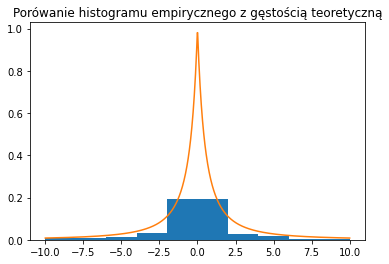

In [18]:
X = s_pareto_gen(1, 1, 1000)
xs = np.linspace(-10, 10, 1000)

g = pareto_pdf(xs, 1, 1)
plt.hist(X, density=True, range=(-10, 10))
plt.title("Porówanie histogramu empirycznego z gęstością teoretyczną")
plt.plot(xs,g)
plt.show()


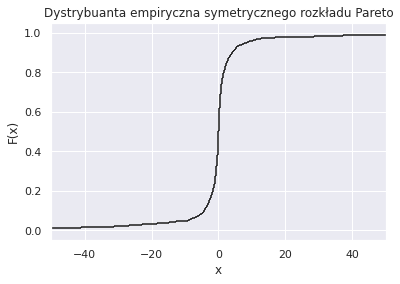

In [26]:
drawdemp(X, title="Dystrybuanta empiryczna symetrycznego rozkładu Pareto", xlim_min=-50, xlim_max=50)

Wykresy empiryczne funkcji charakterystycznej


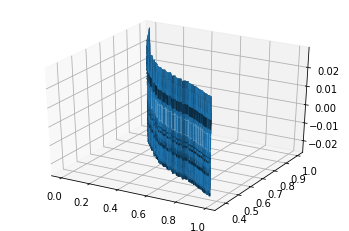

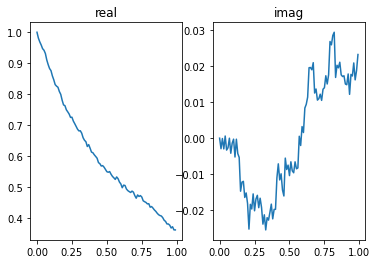

In [ ]:
print("Wykresy empiryczne funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(X, x))
plot_2d_complex(lambda x : empchar(X, x))

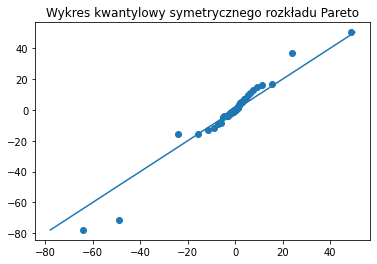

In [ ]:
P = s_pareto_gen(1, 1, 100)
drawqq(P, lambda x: symmetric_pareto_dis(x), title="Wykres kwantylowy symetrycznego rozkładu Pareto")

**Porównanie generatorów zmiennych losowych z symetrycznego rozkładu Pareto**

In [ ]:
alfa = 0.05
X_n = []

for j in range(100):
    P1 = symmetric_pareto_gen(1, 1, 1000)
    P2 = s_pareto_gen(1, 1, 1000)
    X_n.append(stats.ks_2samp(P1, P2).pvalue > alfa)
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", sum(X_n)/100)


Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 0.98


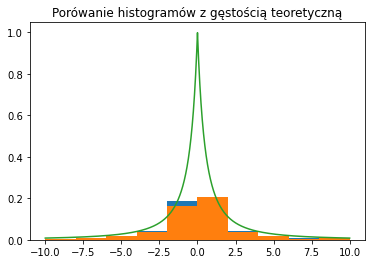

In [20]:
P1 = symmetric_pareto_gen(1, 1, 1000)
P2 = s_pareto_gen(1, 1, 1000)

xs = np.linspace(-10, 10, 10000)
g = pareto_pdf(xs, 1, 1)
plt.hist(P1, density=True, range=(-10, 10))
plt.hist(P2, density=True, range=(-10, 10))
plt.plot(xs,g)
plt.title("Porówanie histogramów z gęstością teoretyczną")
plt.show()

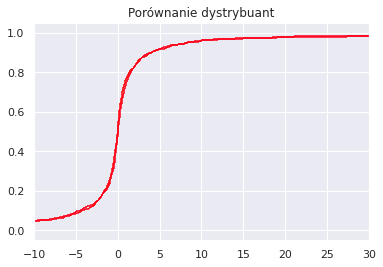

In [153]:
drawdemp_mult([P1, P2], title="Porównanie dystrybuant", xlim_min=-10, xlim_max=30)

Porównanie empirycznych wykresów funkcji charakterystycznej


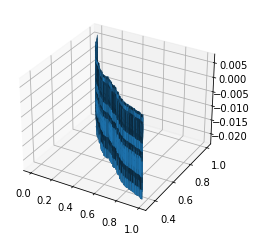

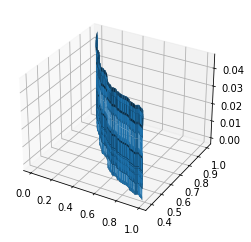

In [21]:
print("Porównanie empirycznych wykresów funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(P1, x))
plot_3d_complex(lambda x : empchar(P2, x))

Porównanie empirycznych wykresów funkcji charakterystycznej


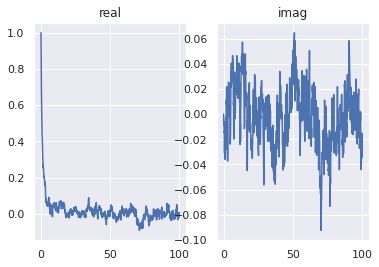

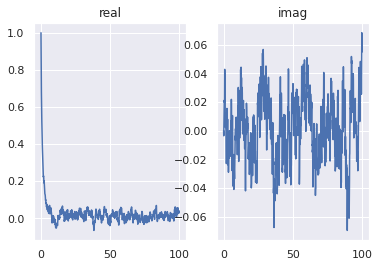

In [176]:
print("Porównanie empirycznych wykresów funkcji charakterystycznej")
ys = np.arange(0, 100, 0.1)
plot_2d_complex(lambda x : empchar(P1, x), xs=ys)
plot_2d_complex(lambda x : empchar(P2, x), xs=ys)

**Wniosek**

Generatory działają dobrze i dają podobne rezultaty.

**Generator liczb z niesymetrycznego rozkładu Pareto**

Generator liczb z niwsymetrycznego rozkładu Pareto napisany za pomocą metody 
odwracania dystrybuanty.

Niesymetryczny rozkład Pareto zdefiniowany dystrybuantą postaci:
$$F(x) = 1 - \frac{1}{(1 + Ax)^{\alpha}},$$
gdzie $\alpha \in (0,2)$,  $A > 0$ , $x>0$.

In [22]:
def asymmetric_pareto_dis(x, A=1, a=1):
    """ Asymmetric Pareto distribution """
    if x <= 0:
        return 0
    else:
        return 1 - 1/((1 + A*x)**a)

def asymmetric_pareto_gen(n, A=1, a=1):
    """Returns random variables from the Asymmetric Pareto distribution"""
    U = R.random_float(n=n, to_float=True)
    y = [1/(((1-i)**(1/a))*A) - 1/A for i in U]
    return y

In [23]:
a = asymmetric_pareto_gen(1000, A=1, a=1)

KS1 = pareto_compatibility2(dist=np.vectorize(asymmetric_pareto_dis))
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS1)


Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 0.97


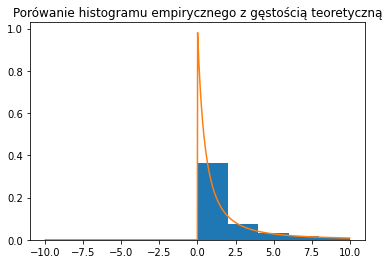

In [ ]:
xs = np.linspace(-10, 10, 1000)
g = stats.pareto.pdf(xs, 1, loc=-1)
plt.hist(a, density=True, range=(-10, 10))
plt.plot(xs,g)
plt.title("Porówanie histogramu empirycznego z gęstością teoretyczną")
plt.show()

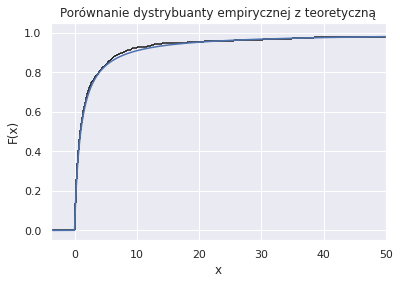

In [31]:
drawdemp(a, sub=lambda x: stats.pareto.cdf(x, 1, loc=-1), title="Porównanie dystrybuanty empirycznej z teoretyczną",xlim_min=0, xlim_max=50)

Wykresy empiryczne funkcji charakterystycznej


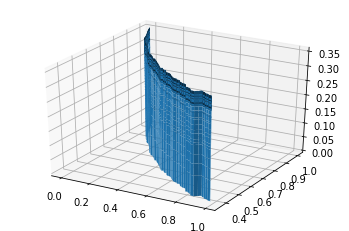

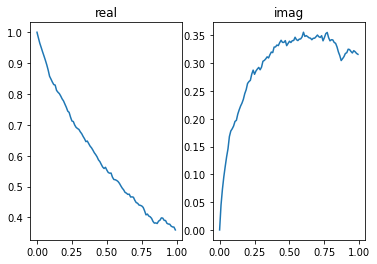

In [ ]:
print("Wykresy empiryczne funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(a, x))
plot_2d_complex(lambda x : empchar(a, x))

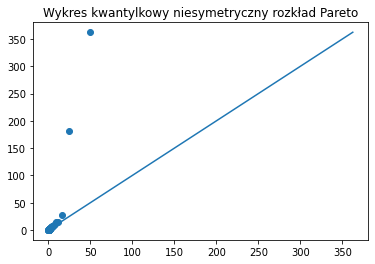

In [ ]:
a = asymmetric_pareto_gen(50, A=1, a=1)
drawqq(a, lambda x: stats.pareto.cdf(x, 1, loc=-1), title="Wykres kwantylkowy niesymetryczny rozkład Pareto")

Generator działa poprawnie. Przechodzi test Kołmogorowa-Smirnowa powyżej 95%. Wykresy dystrybuanty empirycznej i teoretycznej pokrywają się. Wykresy funkcji charakterystycznych również.

**Obszary przeciągania rozkładów stabilnych oraz Uogólnione Centralne Twierdzenie Graniczne**

**Obszary przeciągania rozkładów stabilnych**

*def.*

Mówimy, że **rozkład $\mathcal{R}$ należy do obszaru przyciągania pewnego rozkładu stabilnego $S(α, β, \mu, \sigma)$**, jeżeli dla ciągu $X_1, X_2, ...$ niezależnych zmiennych losowych o jednakowym rozkładzie $\mathcal{R}$ istnieją ciągi stałych $a_n \in \mathbb{R}, b_n > 0$, takie że

$$\frac{X_1 + X_2 +...+X_n - a_n}{b_n}  \mathop{\longrightarrow}_{n \to \infty}^{d} Y,$$

gdzie $Y$ ma rozkład $S(α, β, \mu, \sigma)$.

Mówimy, że rozkład $\mathcal{R}$ należy do **normalnego** obszaru przyciągania pewnego rozkładu stabilnego $S(α, β, \mu, \sigma)$, jeżeli powyższy warunek zachodzi dla $b_n ∝ n^{\frac{1}{\alpha}}$.

**Uogólnione Centralne Twierdzenie Graniczne**

Klasyczne Centralne Twierdzenie Graniczne mówi, że znormalizowana suma niezależnych zmiennych losowy o tym samym rozkładzie, takiej samej wartości oczekiwanej $\mu $ oraz dodatniej i skończonej wariancji $\sigma ^{2}$ zbiega według rozkładu do standardowego rozkładu normalnego, gdy $n \to \infty$, co można zapisać:

$$\frac{\frac{X_1 + X_2 +...+X_n}{n} - \mu}{\frac{\sigma}{\sqrt{n}}}  \mathop{\longrightarrow}_{n \to \infty}^{d} Y \sim \mathcal{N}(0,1).$$


Uogólnione centralne twierdzenie graniczne pokazuje, że jeśli nie jest spełnione założenie o skończonej wariancji, to znormalizowana suma niezależnych zmiennych losowy o tym samym rozkładzie może jedyne zbiegać do rozkładu stabilnego.


Jeśli $X_i$ są niezależnymi zmiennymi losowymi o jednakowym rozkładzie, $a_n > 0$ i $b_n \in \mathbb{R}$ są to pewne stałe, wówczas zmienna losowa $Z$ posiada rozkład stabilny

$$a_n(X_1 + X_2 +...+X_n) - b_n \mathop{\longrightarrow}_{n \to \infty}^{d} Z\sim S(α, β, \mu, \sigma).$$

Symulacyjne sprawdzenie Uogólnionego Centralnego Twierdzenie Granicznego dla liczb z symetrycznego rozkładu Pareto (generator sugerowany)

In [32]:
def Generalized_CLT1(a, n=1000, N=1000, lim=2):
    """Returns the normalized sum of independent random variables from Symmetric Pareto distribution 
    0 < a < 2 - stability parameter,
    n - sample size,
    N - number of iterations,
    lim - constant,
    """
    X=[]
    c_n = (2*gamma(a)*np.sin(np.pi*a/2))/(np.pi*lim)
    for i in range(N):
        sample = s_pareto_gen( a, 1, n)
        x = ((sum(sample))/((n**(1/a))))*c_n
        X.append(x)
    return X

In [33]:
c = Generalized_CLT1(1/2)

sample = stats.levy_stable.rvs(alpha=1/2, beta=0, size=len(c), scale=1)
KS2 = compatibility_2(1/2, 0, 0, 1, sample, n=100)
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS2)


Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 1.0


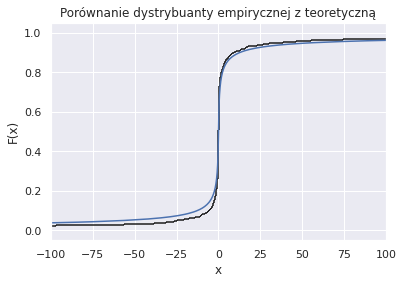

In [37]:
drawdemp(c, sub=lambda x: stats.levy_stable.cdf(x, alpha=1/2, beta=0, loc=0, scale=1), title="Porównanie dystrybuanty empirycznej z teoretyczną",xlim_min=-100, xlim_max=100)

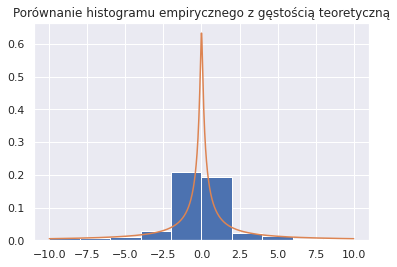

In [35]:
xs = np.linspace(-10, 10, 1000)
g = stats.levy_stable.pdf(xs, alpha=1/2, beta=0, scale=1)
plt.hist(c, density=True, range=(-10, 10))
plt.title("Porównanie histogramu empirycznego z gęstością teoretyczną")
plt.plot(xs,g)


Wykres empiryczny funkcji charakterystycznej


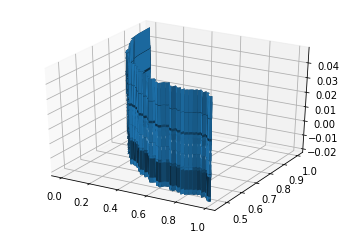

Wykres teoretyczny funkcji charakterystycznej


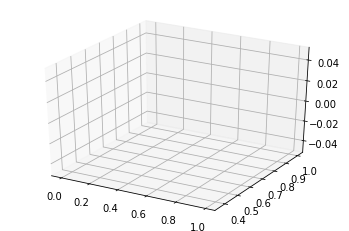

In [ ]:
print("Wykres empiryczny funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(c, x))
print("Wykres teoretyczny funkcji charakterystycznej")
plot_3d_complex(stable_char)

Wykresy empiryczne funkcji charakterystycznej


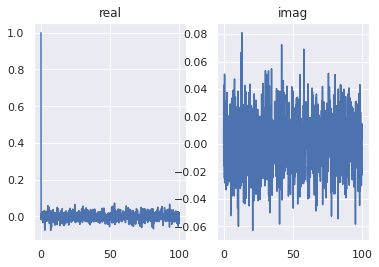

Wykresy teoretyczne funkcji charakterystycznej


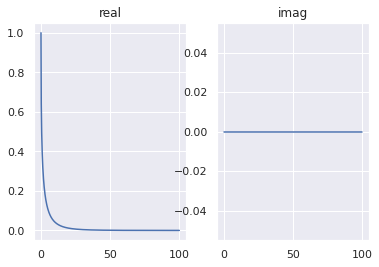

In [177]:
ys = np.arange(0, 100, 0.1)
print("Wykresy empiryczne funkcji charakterystycznej")
plot_2d_complex(lambda x : empchar(c, x), xs=ys)
print("Wykresy teoretyczne funkcji charakterystycznej")
plot_2d_complex(stable_char, xs=ys)

**Symulacyjne sprawdzenie Uogólnionego Centralnego Twierdzenie Granicznego dla liczb z symetrycznego rozkładu Pareto**

In [178]:
def Generalized_CLT2(a, n=1000, N=1000, lim=1):
    """Returns the normalized sum of independent random variables from Symmetric Pareto distribution 
    0 < a < 2 - stability parameter,
    n - sample size,
    N - number of iterations,
    lim - constant."""
    X=[]
    c_n = (2*gamma(a)*np.sin(np.pi*a/2))/(np.pi*lim)
    for i in range(N):
        sample = symmetric_pareto_gen(a, 1, n)
        x = ((sum(sample))/((n**(1/a))))*c_n
        X.append(x)
    return X

In [180]:
c = Generalized_CLT2(1/2)

sample = stats.levy_stable.rvs(alpha=1/2, beta=0, size=len(c), scale=1)
KS2 = compatibility_2(1/2, 0, 0, 1, sample, n=100)
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS2)

Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 0.96


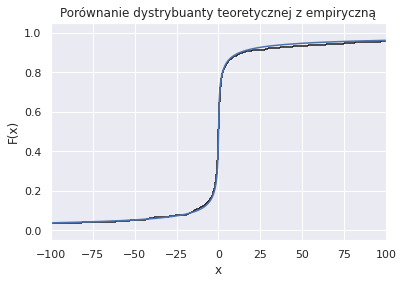

In [42]:
drawdemp(c, sub=lambda x: stats.levy_stable.cdf(x, alpha=1/2, beta=0, loc=0, scale=1), title="Porównanie dystrybuanty teoretycznej z empiryczną", xlim_min=-100, xlim_max=100)


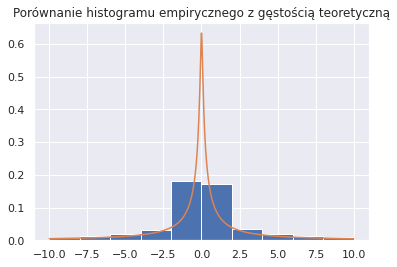

In [38]:
xs = np.linspace(-10, 10, 1000)
g = stats.levy_stable.pdf(xs, alpha=1/2, beta=0, scale=1)
plt.hist(c, density=True, range=(-10, 10))
plt.title("Porównanie histogramu empirycznego z gęstością teoretyczną")
plt.plot(xs,g)


Wykres empiryczny funkcji charakterystycznej


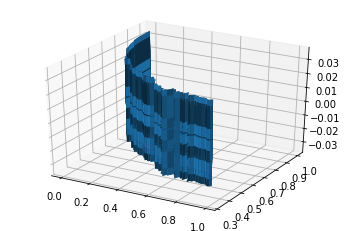

Wykres teoretyczny funkcji charakterystycznej


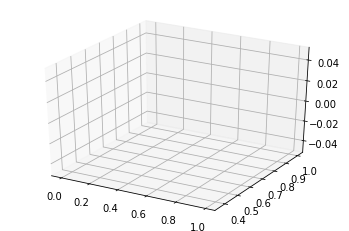

In [ ]:
print("Wykres empiryczny funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(c, x))
print("Wykres teoretyczny funkcji charakterystycznej")
plot_3d_complex(stable_char)

Wykresy empiryczne funkcji charakterystycznej


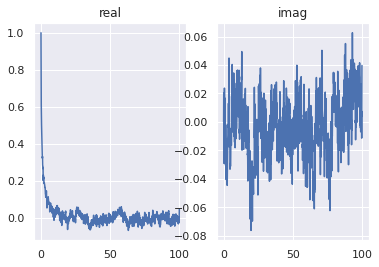

Wykresy teoretyczne funkcji charakterystycznej


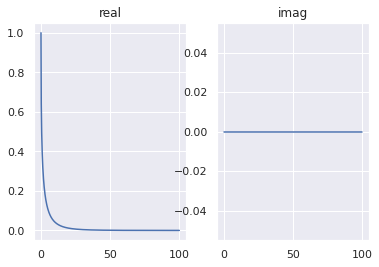

In [181]:
ys = np.arange(0, 100, 0.1)
print("Wykresy empiryczne funkcji charakterystycznej")
plot_2d_complex(lambda x : empchar(c, x),xs=ys)
print("Wykresy teoretyczne funkcji charakterystycznej")
plot_2d_complex(stable_char, xs=ys)

**Wniosek**

Unormowana suma $n$ niezależnych zmiennych losowych z symetrycznego rozkładu Pareto zbiega według rozkładu do rozkładu stabilnego, gdy $n$ rośnie do nieskończoności.

**Symulacyjne sprawdzenie Uogólnionego Centralnego Twierdzenie Granicznego dla liczb z niesymetrycznego rozkładu Pareto**

[Zródło dla innej normalizacji dla GCLT](https://escholarship.org/uc/item/8940b4k8)




In [182]:
def Generalized_CLT3(a, n=1000, N=1000):
    """Returns the normalized sum of independent random variables from Asymmetric Pareto distribution 
    0 < a < 2 - stability parameter,
    n - sample size,
    N - number of iterations."""
    X=[]
    C = 0.5772#Euler constant
    for i in range(N):  
        sample = asymmetric_pareto_gen(n, A=1, a=a)
        if a < 1:
            b_n = 0
            c_n = (gamma(1 - a)*np.cos(np.pi*a/2))**(1/a)
        elif 1 < a and a < 2:
            b_n = n*a/(a - 1)
            c_n = (gamma(1 - a)*np.cos(np.pi*a/2))**(1/a)
        else:
            b_n = n*np.log(n) + n*(1 - C - np.log(2/np.pi))
            c_n = np.pi/2
        x = (sum(sample) - b_n)/((n**(1/a))*c_n)
        X.append(x)
    return X


In [183]:
c = Generalized_CLT3(1/2)

sample = stats.levy_stable.rvs(alpha=1/2, beta=1, size=len(c))
KS2 = compatibility_2(1/2, 1, 0, 1, sample, n=100)
print("Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach:", KS2)

Prawdopodobieństwo przejścia testu Kołmogorowa-Smirnowa w n=100 próbach: 1.0


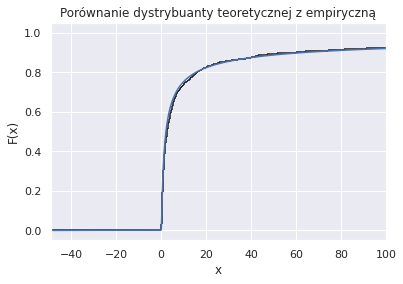

In [46]:
drawdemp(c, sub=lambda x: stats.levy_stable.cdf(x, alpha=1/2, beta=1,loc=0, scale=1), title="Porównanie dystrybuanty teoretycznej z empiryczną", xlim_min=0, xlim_max=100)

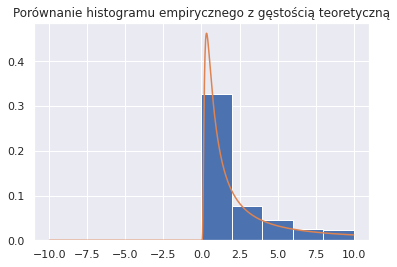

In [47]:
xs = np.linspace(-10, 10, 1000)
g = stats.levy_stable.pdf(xs, alpha=1/2, beta=1)
plt.hist(c, density=True, range=(-10, 10))
plt.title("Porównanie histogramu empirycznego z gęstością teoretyczną")
plt.plot(xs,g)


Wykres empiryczny funkcji charakterystycznej


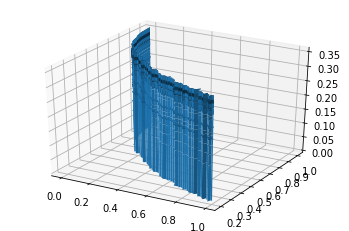

Wykres teoretyczny funkcji charakterystycznej


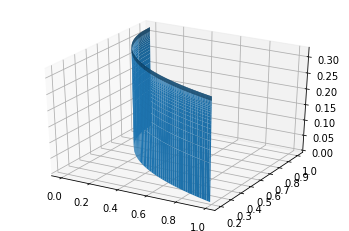

In [ ]:
print("Wykres empiryczny funkcji charakterystycznej")
plot_3d_complex(lambda x : empchar(c, x))
print("Wykres teoretyczny funkcji charakterystycznej")
plot_3d_complex(lambda x :stable_char(x, a=1/2, b=1))

Wykrey empiryczne funkcji charakterystycznej


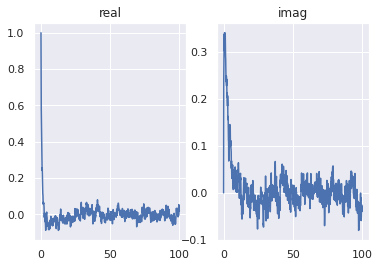

Wykresy teoretyczne funkcji charakterystycznej


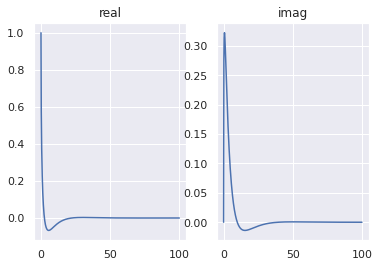

In [184]:
ys = np.arange(0, 100, 0.1)
print("Wykrey empiryczne funkcji charakterystycznej")
plot_2d_complex(lambda x : empchar(c, x), xs=ys)
print("Wykresy teoretyczne funkcji charakterystycznej")
plot_2d_complex(lambda x :stable_char(x, a=1/2, b=1), xs=ys)

**Wniosek**

Unormowana suma $n$ niezależnych zmiennych losowych z niesymetrycznego rozkładu Pareto zbiega według rozkładu do rozkładu stabilnego, gdy $n$ rośnie do nieskończoności.

#Zmienne losowe ściśle stabilne i nieskończenie podzielne

**Inna (równoważna) definicja rozkładu $\alpha$ - stabilnego**

Zmienna losowa $Y$ ma **rozkład $\alpha$-stabilny**, jeśli $\forall_{n \in\mathbb{N} }$ $ \exists_{c_n>0}$, $D_n \in \mathbb{R}$ takie, że

$$Y_1 + Y_2 + ... + Y_n\stackrel{d}{=}C_nY + D_n,$$
gdzie $Y_1, Y_2, ..., Y_n$ - niezależne kopie zmiennej losowej $Y$, $C_n = n^{\frac{1}{\alpha}}$, $\alpha \in (0, 2]$.

Jeśli $D_n=0$ to mówimy, że $Y$ ma **rozkład śliśle stabilny**.




Gdy $X \sim S(α, β, \mu, \sigma)$ z $\alpha \neq 1$. Wtedy $X$ ma rozkład ściśle stabilny wtedy i tylko wtedy gdy $\mu = 0.$

Gdy $X \sim S(α, β, \mu, \sigma)$ z $\alpha \neq 1$. Wtedy $X - \mu$ ma rozkład ściśle stabilny.

Gdy $X \sim S(1, β, \mu, \sigma)$ z $\alpha \neq 1$. Wtedy $X$ ma rozkład ściśle stabilny wtedy i tylko wtedy gdy $\beta=0$.



**Rozkłady nieskończenie podzielne**

Zmienna losowa $X$ nazywana jest nieskończenie podzilną, gdy można ją przedstawić jako suma n niezależnym zmiennych losowych o tym samym rozkładzie

$$X_{n,1} + X_{n,2} + ... + X_{n,n}\stackrel{d}{=}X, $$

$X_{n,1}, X_{n,2}, ... , X_{n,n}$ - i.i.d.

**Wszystkie rozkłady stabilne są nieskończenie podzielne.**

In [221]:
def strictly_stable(a, N, b=0, mu=0, s=1):
    """Returns lists of random variables
    Y - list of  N random variables from a stable distribution multiplied by the sequence c_n,
    Z - list of sums of N random variables from a stable distribution,
    a - stability parameter,
    b - skewness parameter,
    mu - location parameter,
    s - scale parameter > 0."""   
    Y = []
    Z = []
    c_n = N**(1/a)
    for i in range(N):
        stable = stable_distribution(a, b, mu, s, 1)
        stable2 = stable_distribution(a, b, mu, s, N)
        Y.append(c_n*stable[0])
        Z.append(sum(stable2))
    return Y, Z

In [224]:
a, b = strictly_stable(2, 1000, s=np.sqrt(2)/2)

print("Rozkład normalny")
alfa = 0.05
print("Test Kołmogorowa-Smirnowa:", stats.ks_2samp(a, b).pvalue > alfa)# jeden test, ponieważ kod długo się wykonuje dla kilku 

Rozkład normalny
Test Kołmogorowa-Smirnowa: True


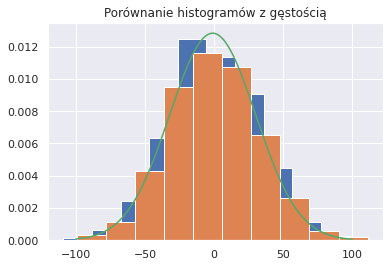

In [188]:
xs = np.linspace(-100, 100, 10000)
loc, scale = stats.norm.fit(a)
plt.hist(a, density=True)
plt.hist(b, density=True)
plt.plot(xs, stats.norm.pdf(xs, loc=loc, scale=scale))
plt.title("Porównanie histogramów z gęstością")
plt.show()



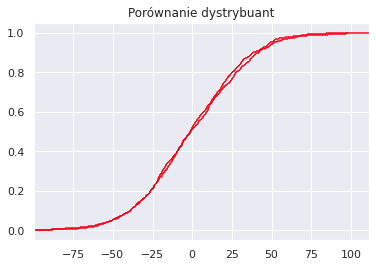

In [189]:
drawdemp_mult([a, b], title="Porównanie dystrybuant")

Porównanie funkcji charakterystycznych


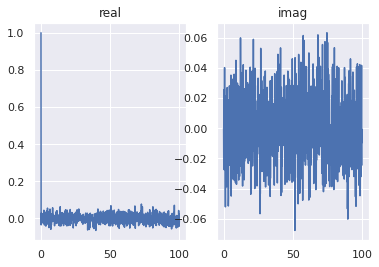

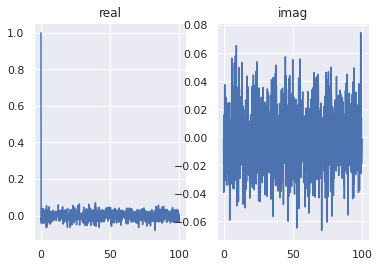

In [190]:
ys = np.arange(0, 100, 0.1)
print("Porównanie funkcji charakterystycznych")
plot_2d_complex(lambda x : empchar(a, x), xs=ys)
plot_2d_complex(lambda x : empchar(b, x), xs=ys)

**Wniosek**

Rozkład Normalny jest rokładem nieskończenie podzielnym oraz ściśle stabilnym.

In [123]:
y, z = strictly_stable(1, 1000)
print("Rozkład Cauchy")

alfa = 0.05
print("Test Kołmogorowa-Smirnowa:", stats.ks_2samp(y, z).pvalue > alfa)# jeden test, ponieważ kod długo się wykonuje dla kilku 

Rozkład Cauchy
Test Kołmogorowa-Smirnowa: True


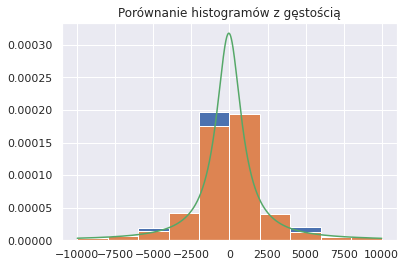

In [124]:
xs = np.linspace(-10000, 10000, 1000000)
loc, scale = stats.cauchy.fit(y)

plt.hist(y, density=True, range=(-10000, 10000))
plt.hist(z, density=True, range=(-10000, 10000))
plt.plot(xs, stats.cauchy.pdf(xs, loc=loc, scale=scale))
plt.title("Porównanie histogramów z gęstością")
plt.show()


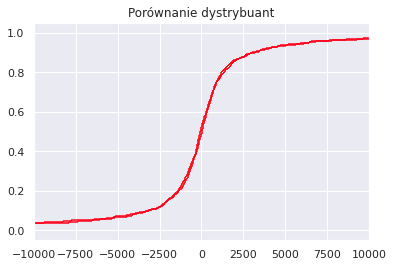

In [108]:
drawdemp_mult([y, z], title="Porównanie dystrybuant", xlim_min=-10000, xlim_max=10000)

Porównanie funkcji charakterystycznych


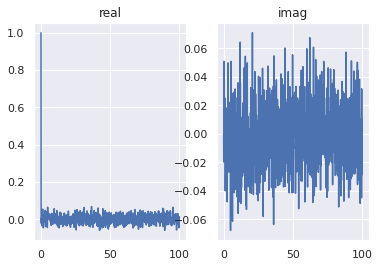

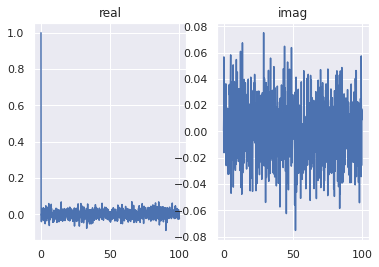

In [191]:
ys = np.arange(0, 100, 0.1)
print("Porównanie funkcji charakterystycznych")
plot_2d_complex(lambda x : empchar(y, x), xs=ys)
plot_2d_complex(lambda x : empchar(z, x), xs=ys)

**Wniosek**

Rozkład Cauchy'ego jest rokładem nieskończenie podzielnym oraz ściśle stabilnym.

In [213]:
c, d = strictly_stable(3/2, 1000, b=0)

print("Rozkład Holtsmarka")
alfa = 0.05
print("Test Kołmogorowa-Smirnowa:", stats.ks_2samp(c, d).pvalue > alfa)# jeden test, ponieważ kod długo się wykonuje dla kilku 

Rozkład Holtsmarka
Test Kołmogorowa-Smirnowa: True


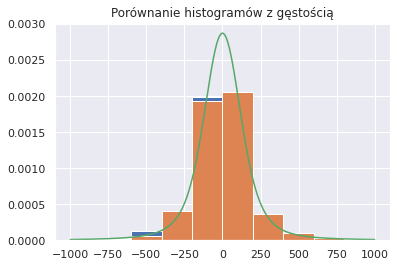

In [211]:
xs = np.linspace(-550, 550, 100000)
c_n = 1000**(2/3)
plt.hist(c, density=True, range=(-1000,1000))
plt.hist(d, density=True, range=(-1000,1000))
plt.plot(xs, stats.levy_stable.pdf(xs, alpha=3/2,beta=0, loc=0, scale=1*abs(c_n)))#korzystamy z własności 3.
plt.title("Porównanie histogramów z gęstością")
plt.show()


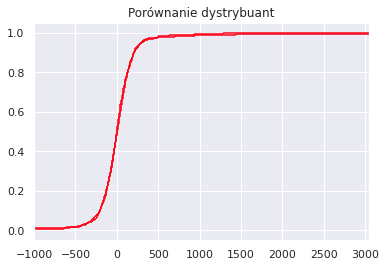

In [215]:
drawdemp_mult([c, d], title="Porównanie dystrybuant", xlim_min=-1000)

Porównanie funkcji charakterystycznych


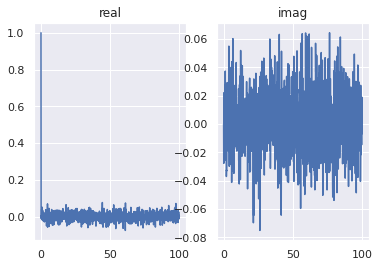

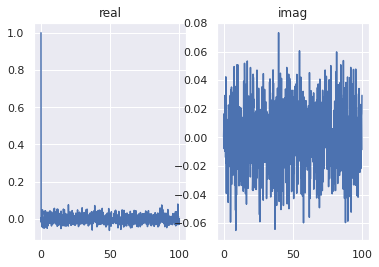

In [197]:
ys = np.arange(0, 100, 0.1)
print("Porównanie funkcji charakterystycznych")
plot_2d_complex(lambda x : empchar(c, x), xs=ys)
plot_2d_complex(lambda x : empchar(d, x), xs=ys)

**Wniosek**

Rozkład Rozkład Holtsmarka jest rokładem nieskończenie podzielnym oraz ściśle stabilnym.

**Sumy niezależnych zmiennych losowych o tym samym rozkładzie $\alpha$ - stabilnym**

In [24]:
def sum_of_random_var(n, a, b, mu=0, s=1, N=1000):
    """Returns lists of random variables
    Z - list of sums of N random variables from a stable distribution"""
    Z = []
    for i in range(n):
        stable2 = stable_distribution(a, b, mu, s, N)
        Z.append(sum(stable2))
    return Z

In [25]:
print("Suma niezależnych zmiennych losowych z rozkładu normalnego")
z = sum_of_random_var(1000, 2, b=0, mu=0, s=np.sqrt(2)/2, N=1000)
print("Średnia: ",np.mean(z))
print("Wariancja: ",np.var(z))


Suma niezależnych zmiennych losowych z rozkładu normalnego
Średnia:  -0.9230469057609314
Wariancja:  1027.4145098983329


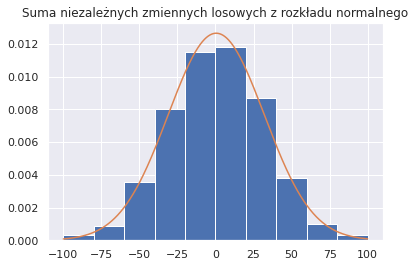

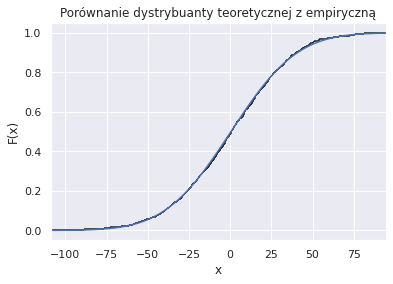

In [139]:
xs = np.linspace(-100, 100, 10000)

plt.hist(z, density=True, range=(-100, 100))
plt.plot(xs, norm_pdf(xs, np.mean(z), np.sqrt(np.var(z))))
plt.title("Suma n niezależnych zmiennych losowych z rozkładu normalnego")
plt.show()
drawdemp(z, sub=lambda x: norm_cdf(x, np.mean(z), np.sqrt(np.var(z))), title='Porównanie dystrybuanty teoretycznej z empiryczną')

**Wniosek**

Suma n niezależnych zmiennych losowych z rozkładu normalnego ma rozkład normalny. 

Suma niezależnych zmiennych losowych z rozkładu Cauchy'ego


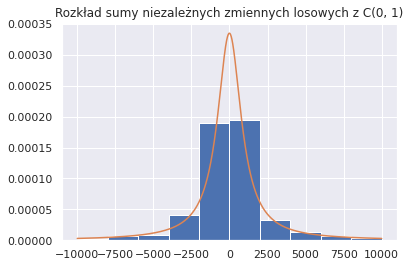

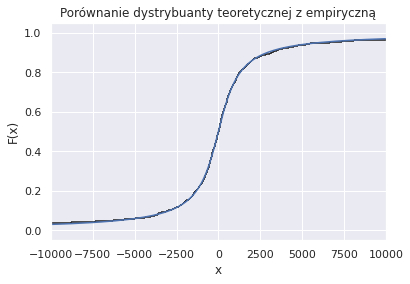

In [142]:
print("Suma n niezależnych zmiennych losowych z rozkładu Cauchy'ego")
y = sum_of_random_var(1000, 1, b=0, mu=0, s=1, N=1000)

loc, scale = stats.cauchy.fit(y)

t = np.linspace(-10000, 10000, 100000)
plt.hist(y, density=True, range=(-10000, 10000))
plt.plot(t, stats.cauchy.pdf(t,loc=loc, scale=scale),)
plt.title("Rozkład sumy niezależnych zmiennych losowych z C(0, 1)")
plt.show()

drawdemp(y, sub=lambda x: stats.cauchy.cdf(x,loc=loc, scale=scale), title='Porównanie dystrybuanty teoretycznej z empiryczną', xlim_min=-10000,xlim_max=10000)

**Wniosek**

Suma n niezależnych zmiennych losowych z rozkładu Cauchy'ego ma rozkład Cauchy'ego. 

Suma niezależnych zmiennych losowych z rozkładu Levy'ego


/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


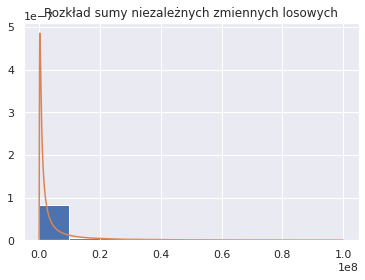

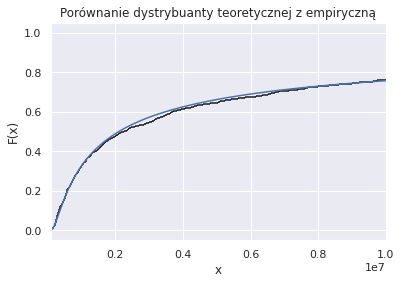

In [159]:
z = sum_of_random_var(1000, 1/2, b=1, mu=0, s=1, N=1000)

print("Suma niezależnych zmiennych losowych z rozkładu Levy'ego")

loc2, scale2 = stats.levy.fit(z)
xs = np.linspace(1000, 10*10**7, 1000000)
plt.hist(z, density=True, range=(1000, 10*10**7))
plt.title("Rozkład sumy niezależnych zmiennych losowych")
plt.plot(xs, stats.levy.pdf(xs, loc=loc2, scale=scale2))
plt.show()

drawdemp(z, sub=lambda x: stats.levy.cdf(x, loc=loc2, scale=scale2), title='Porównanie dystrybuanty teoretycznej z empiryczną',xlim_min=100000, xlim_max=10000000)

**Wniosek**

Suma niezależnych zmiennych losowych z rozkładu Levy'ego ma rozkład Levy'ego. 

**Ogólne wnioski**

Rozkłady $\alpha$ - stabilne są bardzo ciekawym zagadnieniem mającym wiele zastosowań. 